In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [6]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#images to tensor
#grab the mnist image files and convert it into pytorch tensors
transform=transforms.ToTensor()

In [10]:
#load in the training set into this folder Data specify it is the training data download it and transform it into the tensor
train_data=datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

In [11]:
#Loading the testing set into the folder with same settings as above
test_data=datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [12]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
#examine a single training record
type(train_data)

torchvision.datasets.mnist.MNIST

In [16]:
type(train_data[0]) #its a bunch of tensors grouped together, a tensor and a lable

tuple

In [17]:
image,label=train_data[0]

In [18]:
image.shape #it is a grayscale image, single color channel for black or white

torch.Size([1, 28, 28])

In [19]:
label

5

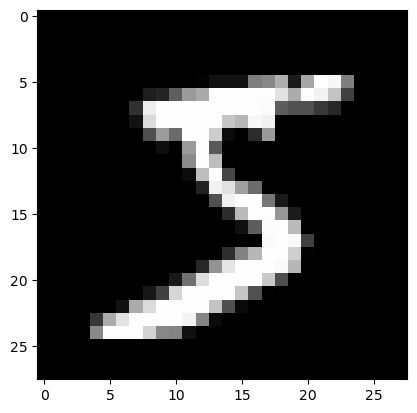

In [21]:
#visualize this with matplotlib
plt.imshow(image.reshape((28,28)),cmap='gray') #viridis, using some sort of color scale

In [23]:
#understand how to load in batches with the data loader
#subsets of 60,000 batches and then load in
torch.manual_seed(101)
train_loader=DataLoader(train_data,batch_size=100,shuffle=True) #feeding 100 images into the network
test_loader=DataLoader(test_data,batch_size=500,shuffle=False)
#train_data is pytorch object that supports dataloading and sampling
#setting shuffle to true means data will be shuffled in each epoch


In [24]:
from torchvision.utils import make_grid
#print the labels right on top of the grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #formatting

In [25]:
#grab the first batch of images
for images,labels in train_loader:
    break
    #batch size rn is 100, since there are 60,000 images, the loop will go through 60 times. We want the first batch
    

In [26]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [27]:
images.shape

torch.Size([100, 1, 28, 28])

In [28]:
labels.shape

torch.Size([100])

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


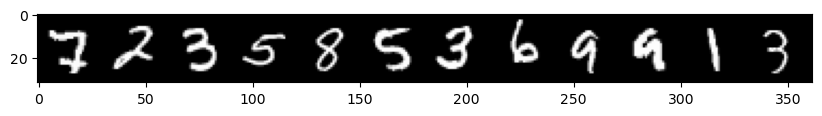

In [29]:
#print the fist 12 labels
print('Labels:',labels[:12].numpy())
#print the first 12 images
im=make_grid(images[:12],nrow=12)
#grab 12 images define the number of rows and we say plt figure and make the image larger
plt.figure(figsize=(10,4))
#we transpose the images to make it seen properly
plt.imshow(np.transpose(im.numpy(),(1,2,0)));
#we print out the 12 labels